# Book 3: How to do concatenate data frames

Here we will go over how to use ```pandas``` to read several ```.csv``` files and then **concatenate** them into a single table. This is very useful to load the results of different conditions, or biological replicates, and to **tag** these conditions so we can later use them to compare results and do statistical tests.

## Load the data
Let us use what we learned before to load the ```.csv``` table into a data frame

In [7]:
import pandas as pd 

df1 = pd.read_csv('./data/Results_01.csv')

print(df1.head())

          Label  Area    Perim.    Circ.       AR    Round  Solidity
0  1  blobs.gif   425  90.42641  0.65314  2.06670  0.48386   0.88542
1  2  blobs.gif   181  55.21320  0.74611  1.77749  0.56259   0.94517
2  3  blobs.gif   656  96.52691  0.88474  1.06472  0.93921   0.96970
3  4  blobs.gif   430  79.11270  0.86335  1.06156  0.94201   0.95662
4  5  blobs.gif   477  86.04163  0.80968  1.56805  0.63773   0.96657


Lets add a colum to describe the "student" that made the analysis

In [8]:
df1['Student'] = '01'
# Now I use the "to_string" operator which gives a bigger view of the table, we could 
# have also used "head"
print(df1.to_string())

            Label  Area     Perim.    Circ.       AR    Round  Solidity Student
0    1  blobs.gif   425   90.42641  0.65314  2.06670  0.48386   0.88542      01
1    2  blobs.gif   181   55.21320  0.74611  1.77749  0.56259   0.94517      01
2    3  blobs.gif   656   96.52691  0.88474  1.06472  0.93921   0.96970      01
3    4  blobs.gif   430   79.11270  0.86335  1.06156  0.94201   0.95662      01
4    5  blobs.gif   477   86.04163  0.80968  1.56805  0.63773   0.96657      01
5    6  blobs.gif   276   60.52691  0.94672  1.11738  0.89495   0.94845      01
6    7  blobs.gif    70   29.79899  0.99061  1.13553  0.88065   0.90909      01
7    8  blobs.gif   265   61.35534  0.88461  1.38821  0.72035   0.93146      01
8    9  blobs.gif   220   54.52691  0.92985  1.12587  0.88820   0.92827      01
9   10  blobs.gif    26   26.48528  0.46577  3.84899  0.25981   0.86667      01
10  11  blobs.gif   492   82.08326  0.91763  1.07144  0.93333   0.94798      01
11  12  blobs.gif   650   96.91169  0.86

Now we can read a second dataset, and add an extra "student" 02 tag

In [9]:
df2 = pd.read_csv('./data/Results_02.csv')
df2['Student'] = '02'
print(df2.head())

          Label  Area    Perim.    Circ.       AR    Round  Solidity Student
0  1  blobs.gif   433  92.91169  0.63031  2.07469  0.48200   0.85998      02
1  2  blobs.gif   185  55.21320  0.76260  1.77847  0.56228   0.95116      02
2  3  blobs.gif   658  97.35534  0.87240  1.06829  0.93607   0.96694      02
3  4  blobs.gif   434  78.52691  0.88443  1.06364  0.94017   0.95912      02
4  5  blobs.gif   477  85.45584  0.82081  1.56967  0.63708   0.96755      02


Lets see if there are small differences or not

The mean value of Area for Student 1 is: 355.475.
The mean value of Area for Student 2 is: 347.547.


array([[<AxesSubplot: title={'center': 'Area'}>]], dtype=object)

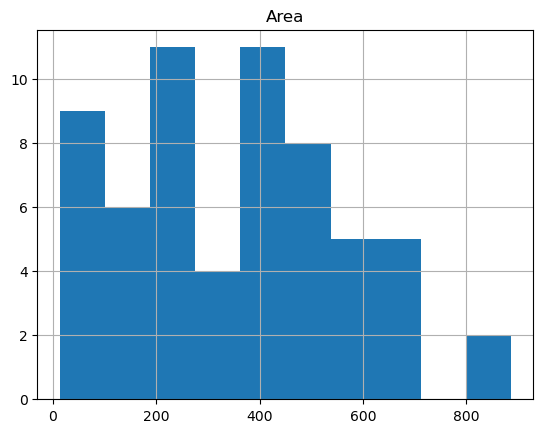

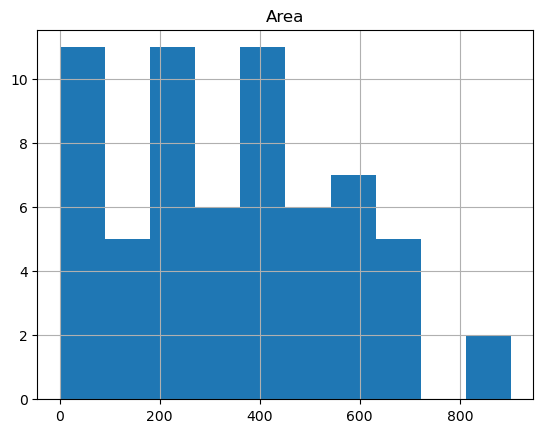

In [10]:
val = df1["Area"].mean()
print(f"The mean value of Area for Student 1 is: {val:.3f}.")
df1.hist(column='Area')

val = df2["Area"].mean()
print(f"The mean value of Area for Student 2 is: {val:.3f}.")
df2.hist(column='Area')

Now instead of keeping track of different data frames is easier if we put these tables together. This operation is called concatenation.

In [11]:
# concatenate
df = pd.concat([df1, df2])
print(df.to_string())

            Label  Area     Perim.    Circ.       AR    Round  Solidity Student
0    1  blobs.gif   425   90.42641  0.65314  2.06670  0.48386   0.88542      01
1    2  blobs.gif   181   55.21320  0.74611  1.77749  0.56259   0.94517      01
2    3  blobs.gif   656   96.52691  0.88474  1.06472  0.93921   0.96970      01
3    4  blobs.gif   430   79.11270  0.86335  1.06156  0.94201   0.95662      01
4    5  blobs.gif   477   86.04163  0.80968  1.56805  0.63773   0.96657      01
5    6  blobs.gif   276   60.52691  0.94672  1.11738  0.89495   0.94845      01
6    7  blobs.gif    70   29.79899  0.99061  1.13553  0.88065   0.90909      01
7    8  blobs.gif   265   61.35534  0.88461  1.38821  0.72035   0.93146      01
8    9  blobs.gif   220   54.52691  0.92985  1.12587  0.88820   0.92827      01
9   10  blobs.gif    26   26.48528  0.46577  3.84899  0.25981   0.86667      01
10  11  blobs.gif   492   82.08326  0.91763  1.07144  0.93333   0.94798      01
11  12  blobs.gif   650   96.91169  0.86

Now let us do a basic boxplot to see if the results of both students are significantly different from one another. Here we benefit from the **Student** tag, we can ask the boxplot to sort the results based on this column value using the ```by=``` variable.

<AxesSubplot: title={'center': 'Area'}, xlabel='Student'>

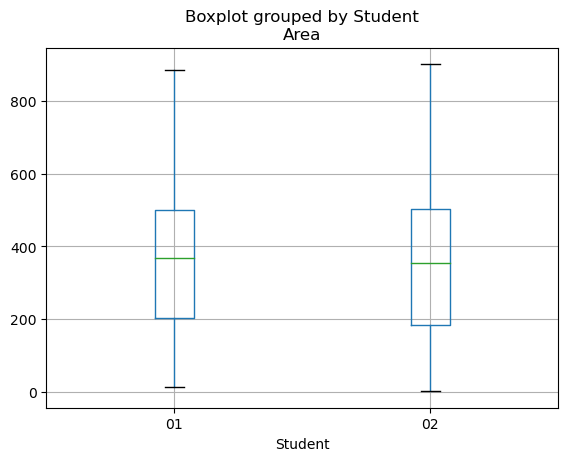

In [12]:
df.boxplot(column="Area",by="Student")